## PRiAD 2 

# Wizualizacja danych


## 1. Pakiety służące do wizualizacji danych

Do najpopularniejszych pakietów wykorzystywanych w wizualizacji danych należą pakiety [`matplotlib`](https://matplotlib.org/) oraz pakiet [`seaborn`](https://seaborn.pydata.org/). Pakiety te, wraz z wcześniej poznanymi pakietami [`numpy`](https://numpy.org/), [`pandas`](https://pandas.pydata.org/) oraz [`scikit image`](https://scikit-image.org/) będa wykorzystywane w niniejszym ćwiczeniu:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray
from skimage.exposure import histogram
#matplotlib inline

## 2. Podstawowe wykresy grafiki prezentacyjnej

**Wykres liniowy** pokazuje serie danych w postaci linii łączacej kolejne punkty danych. Zakłada się przy tym, że współrzędne 'x' kolejnych punktów są uporządkowane rosnąco. W najcześciej występującym wariancie wykresu liniowego na osi odciętych ('x') znajdując się kolejne chwile czasowe, zaś na osi rzędnych znajdują się kolejne wartości pomiarowe (punkty danych, wartości atrybutu) zarejestrowane w tych chwilach czasowych.  Przykład poniższy pokazuje wykres wartości losowych pewnego szeregu czasowego. Funkcja 'cumsum' wyznacza sumę skumulowana wartości losowych. Do wyświetlenia wykorzystywana jest metoda 'plot' obiektu klasy 'Series' pakietu `pandas`. Pomimo, iż jest to metoda obiektu tego pakietu, to w istocie jej działanie polega na wywołaniu odpowiedniej metody znajdującej się w pakiecie 'matplotlib'. 

<AxesSubplot:>

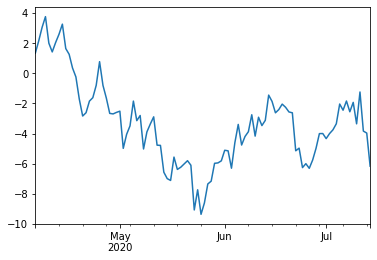

In [2]:
ts = pd.Series(np.random.randn(100),index=pd.date_range('2020-04-06', periods=100))
ts = ts.cumsum()
ts.plot()


Rysunek pokazany powyżej nie wypełnia całego dostępnego miejsca w oknie widoku. W celu uzyskania większego wykresu określić jego rozdzielczość opprzez zastosowanie jednej z funkcji formatujących pole wyświetlania rysunku z pakiety `matplotlib`.

<AxesSubplot:>

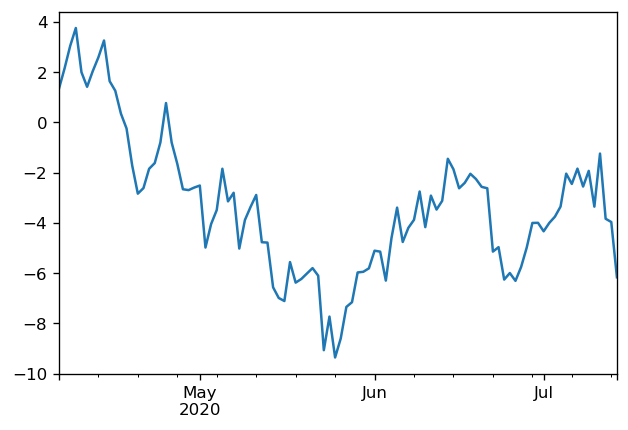

In [3]:
# określamy rozdzielczość wykresu
plt.figure(dpi = 120)
ts.plot()

Parametr rozdzielczości może być także zdefiniowany globalnie. W tym przypadku jego ustawienie pozostaje w mocy także dla kolejnych wykresów.

2019-04-01    0.671444
2019-04-02   -0.373085
2019-04-03   -0.040721
2019-04-04   -1.269007
2019-04-05    0.777252
Freq: D, dtype: float64
2019-04-01    0.671444
2019-04-02    0.298359
2019-04-03    0.257638
2019-04-04   -1.011368
2019-04-05   -0.234116
Freq: D, dtype: float64


<AxesSubplot:>

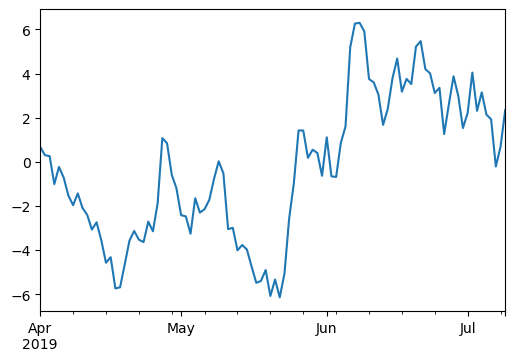

In [4]:
#plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 100
ts = pd.Series(np.random.randn(100),index=pd.date_range('2019-04-01', periods=100))
print(ts.head())
ts = ts.cumsum()
print(ts.head())
ts.plot()


Podobnie do wizualizacji szeregu czasowego przebiega wizualizacja danych znajdujących się w ramce danych. W tym przypadku na wykresie są wyświetlane wykresy pokazujące wartości wszystkich atrybutów. Automatycznie dodawana jest przy tym legenda, prezentująca kolory linii przypisane kolejnym artybutom.

                   A         B         C         D
2019-04-01 -0.026727 -0.003088 -0.953017  0.054202
2019-04-02 -0.651195 -0.812192  0.966445 -0.207453
2019-04-03 -0.303721 -0.073293  0.013403  0.940279
2019-04-04 -0.420144 -1.911554 -0.922813 -0.597663
2019-04-05 -0.487699  0.042965 -0.787003  1.754103


<Figure size 600x400 with 0 Axes>

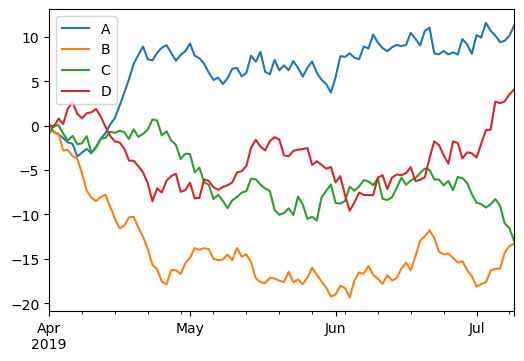

In [5]:
df = pd.DataFrame(np.random.randn(100, 4), index=ts.index, columns=list('ABCD'))
print(df.head())
df = df.cumsum()
plt.figure();
df.plot();

Kolejny przykład pokazuje analogiczny wykres dla rzeczywistych danych - kursów walut znajdujacych się w pliku 'waluty1.xls'. W oryginalnym pliku danych próbki są kolejno numerowane, zaś data jest zapisana w postaci trzech atrybutów (dzień, miesiąc, rok). Dla poprawnego wyświetlenie tych danych konieczna jest wobec tego konwersja polegająca na utworzeniu na podstawie tych trzech atrybutów indeksu ramki danych w postaci zakresu chwil czasowych.

    rok  mies  dzien     CHF     USD     EUR     JPY
0  2010    10      5  2.9809  2.8838  3.9742  3.4617
1  2010    10      4  2.9614  2.8922  3.9577  3.4764
2  2010    10      1  2.9376  2.8772  3.9465  3.4535
3  2010     9     30  2.9955  2.9250  3.9870  3.5129
4  2010     9     29  2.9925  2.9227  3.9710  3.4933
               CHF     USD     EUR     JPY
2010-10-05  2.9809  2.8838  3.9742  3.4617
2010-10-04  2.9614  2.8922  3.9577  3.4764
2010-10-01  2.9376  2.8772  3.9465  3.4535
2010-09-30  2.9955  2.9250  3.9870  3.5129
2010-09-29  2.9925  2.9227  3.9710  3.4933


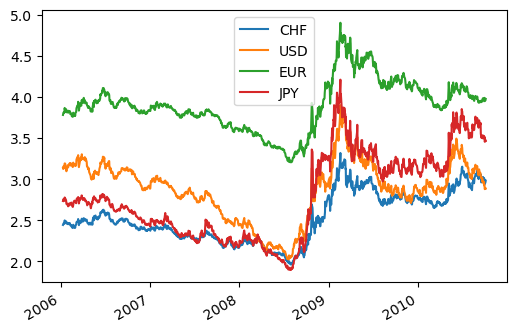

In [6]:
w = pd.read_excel('waluty1.xls')
print(w.head())
w.index = pd.to_datetime(w['rok'].map(str) + "-" + w['mies'].map(str) + "-" + w['dzien'].map(str))
w = w.drop(columns=['rok','dzien','mies'])
#print("\n",w.head())
w.plot()
print(w.head())

> **Zadanie** Wyświetl identyczny wykres, ale średnich kursów miesięcznych (wskazówka - użyj metody `groupby`) 

In [7]:
# rozwiązanie zadania


> **Zadanie** wyświetl podobny wykres dla danych zawartych w pliku 'kursy.xlsx'

In [8]:
# rozwiązanie zadania


Innym popularnym rodzajem wykresu jest **wykres kolumnowy**, w którym wartości kolejnych danych są wyświetlane w postaci pionowego słupka. W poniższym przykładzie wykres słupkowy jest rysowany dla obiektu danych o indeksie 5 - wysokość kolejnych słupków odpowiada wartościom kolejnych atrybutów tego obiektu. 

                   A         B         C         D
2019-04-01 -0.026727 -0.003088 -0.953017  0.054202
2019-04-02 -0.677922 -0.815279  0.013428 -0.153250
2019-04-03 -0.981643 -0.888572  0.026831  0.787029
2019-04-04 -1.401787 -2.800126 -0.895982  0.189365
2019-04-05 -1.889485 -2.757161 -1.682984  1.943468
2019-04-06 -2.054178 -3.436644 -1.151150  2.598660


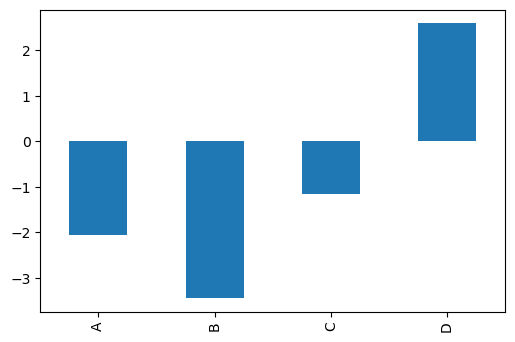

In [9]:

print(df.head(6))
plt.figure();
df.iloc[5].plot(kind='bar');

Standardowo etykiety osi x są odwrócone o 90 stopni. W celu uzyskania ich właściwej orientacji należy użyć argumentu `rot`

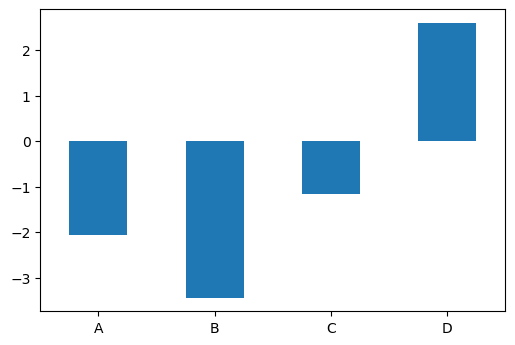

In [10]:
plt.figure();
df.iloc[5].plot(kind='bar',rot=0);

Zmiana typu wykresu na `barh` pozwala na uzyskanie **wykresu słupkowego**, czyli takieg, w którym prostokąty pokazujące kolejne wartości są zorientowane poziomo. 

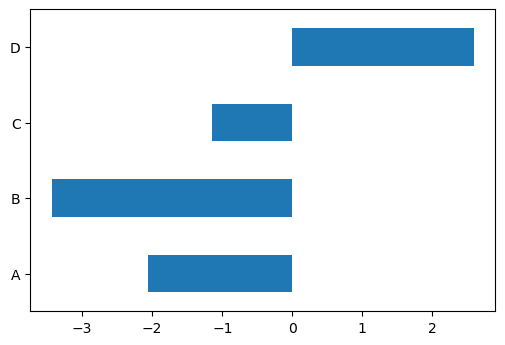

In [11]:
plt.figure();
df.iloc[5].plot(kind='barh',rot=0);

> **Zadanie** Wyświetl wykres słupkowy pokazujący liczbę ludności wszystkich dużych państw świata tj. liczących więcej niż 35 milionów mieszkańców od najmniejszego do największego (wskazówka - wykonaj kolejno: utworzenie nowej ramki danych zawierającej państwa duże, sortowanie tej ramki względem liczby ludności, wyświetlenie wykresu). Dla ułatwienia, pierwsza część kodu jest już gotowa.

In [12]:
# wczytanie i transformacja danych 
panstwa = pd.read_excel('alphabetical-list-of-countries2020.xlsx',header = 4,usecols = range(2,5), index_col = 0)
print(panstwa.head())
panstwa.columns = ['Ludnosc','Powierzchnia']
panstwa.index.name = 'Kraj'
print("\n", panstwa.head())
# rozwiązanie zadania


             Population  Land Area
Country                           
Afghanistan    38928346     652.86
Albania         2877797       27.4
Algeria        43851044  2,381,740
Andorra           77265        470
Angola         32866272  1,246,700

               Ludnosc Powierzchnia
Kraj                              
Afghanistan  38928346       652.86
Albania       2877797         27.4
Algeria      43851044    2,381,740
Andorra         77265          470
Angola       32866272    1,246,700


Dla ramek danych o większej liczbie kolumn, bez ograniczania zakresu do jedynie wybranych, wykres kolumnowy zawiera kolumny przyporządkowane poszczególnym atrybutom (kolumnom ramki danych).

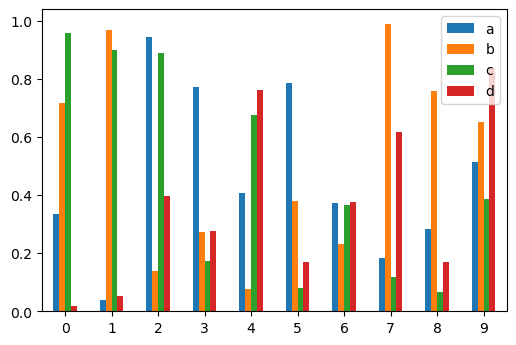

In [13]:
df2 = pd.DataFrame(np.random.rand(10, 4), columns=['a', 'b', 'c', 'd'])
df2.plot.bar(rot=0);

> **Zadanie** Wyswietl wykres kolumnowy przedstawiający średnie kursy czterech walut w każdym roku na  podstawie kursów dziennych zawartych w pliku `waluty1.xls`

In [14]:
# rozwiązanie zadania


Słupki odpowiadające poszczególnym kategoriom mogą być także umieszczone jeden nad drugim.

          a         b         c         d
0  0.333003  0.715325  0.955828  0.017545
1  0.037245  0.968925  0.897898  0.053941
2  0.943802  0.137203  0.887636  0.395134
3  0.772049  0.273568  0.171979  0.275599
4  0.405731  0.077331  0.674544  0.760381


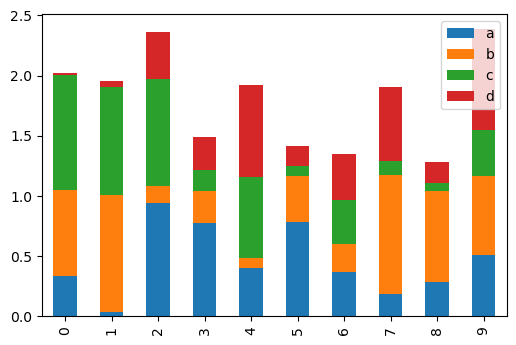

In [15]:
print(df2.head())
df2.plot.bar(stacked=True);

Wykres może być także odwrócony o 90 stopni - otrzymujemy wówczas wykres słupkowy.

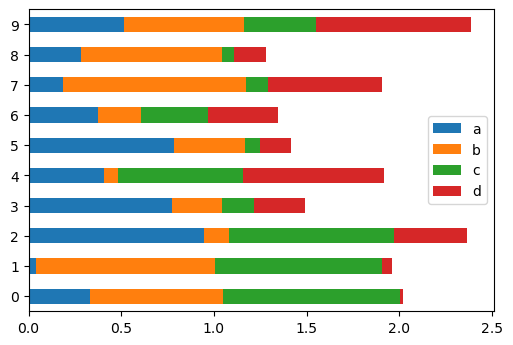

In [16]:
df2.plot.barh(stacked=True);

> **Zadanie** Wyświetl analogiczny wykres ale wartości posortowanych - najkrótszy słupek powinien znajdować na górze, a najdłuższy - na dole (wskazówka - stwórz nową kolumnę zawierającą sumę wartości, a następnie posortuj rosnąco względem tej kolumny).

In [17]:
# rozwiązanie


## 2.3 Statystyczne wykresy jednowymiarowe - histogramy i wykresy pudełkowe

**Histogram** jest wykresem częstości występowania poszczególnych wartości w zbiorze. W przypadku atrybutu ilościowego, liczby wystąpień liczy się w ustalonej liczbie zakresów. Dla większej liczby atrybutów na pojedynczym wykresie, poszczególne histogramy mogą zostać na siebie nałożone.

          a         b         c
0  1.555498 -0.471466 -2.981238
1  2.500663 -1.484860 -1.266731
2  2.306300  1.048933 -1.449754
3  0.706723  0.980741 -1.875529
4  1.219103 -1.074803 -1.188020


<AxesSubplot:>

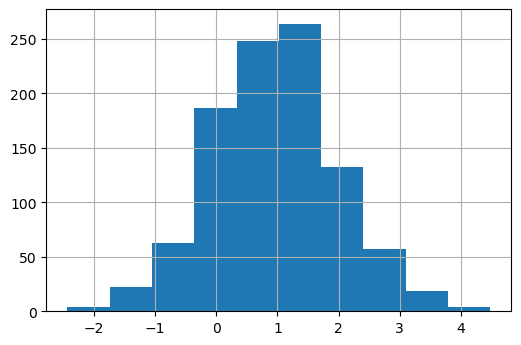

In [18]:
df4 = pd.DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                    'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
print(df4.head())
plt.figure();
#df4['a'].plot.hist()
df4['a'].hist()

Liczbę zakresów ustala się przy pomocy argumentu `bins`. Poniższy przykład pokazuje histogramy tego samego zbioru danych, ale dla różnych ilości przedziałów tj. z różną liczbą słupków, a co za tym idzie innym zakresem osi rzędnych.

<AxesSubplot:ylabel='Frequency'>

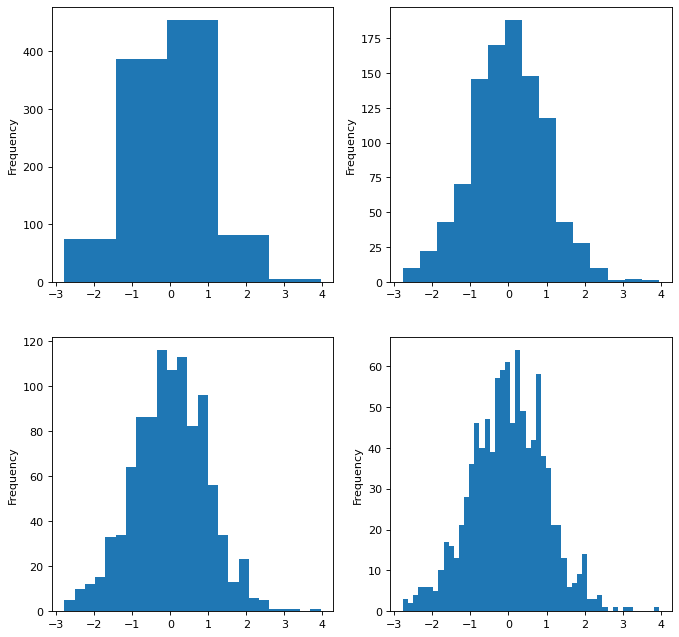

In [19]:
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(2,2,1)
df4['b'].plot.hist(bins=5)
plt.subplot(2,2,2)
df4['b'].plot.hist(bins=15)
plt.subplot(2,2,3)
df4['b'].plot.hist(bins=25)
plt.subplot(2,2,4)
df4['b'].plot.hist(bins=50)

Histogramy większej liczby atrybutów moga być wyświetlane jako odrębne wykresy.

          a         b         c
0  1.555498 -0.471466 -2.981238
1  2.500663 -1.484860 -1.266731
2  2.306300  1.048933 -1.449754
3  0.706723  0.980741 -1.875529
4  1.219103 -1.074803 -1.188020


array([[<AxesSubplot:title={'center':'a'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'c'}>, <AxesSubplot:>]], dtype=object)

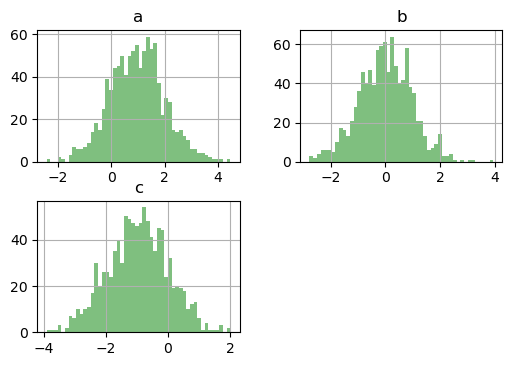

In [20]:
print(df4.head())
df4.hist(color='g', alpha=0.5, bins=50)

Ale histogramy większej liczby atrybutów moga także zostać pokazane na pojedynczym wykresie.

          a         b         c
0  1.555498 -0.471466 -2.981238
1  2.500663 -1.484860 -1.266731
2  2.306300  1.048933 -1.449754
3  0.706723  0.980741 -1.875529
4  1.219103 -1.074803 -1.188020


<AxesSubplot:ylabel='Frequency'>

<Figure size 600x400 with 0 Axes>

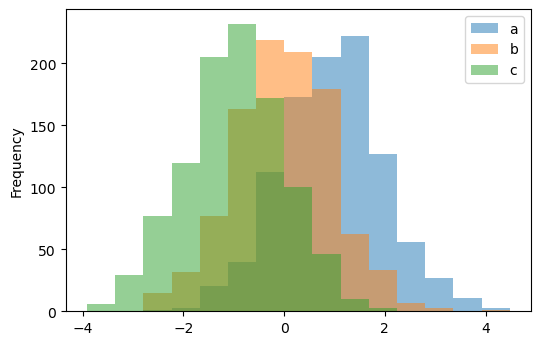

In [21]:
print(df4.head())
plt.figure();
df4.plot.hist(alpha=0.5, bins = 15)

Atrybut `stacked` umożliwia uzyskanie sumarycznego histogramu wszystkich atrybutów, z rozróżnieniem udziału każdego przy pomocy koloru.

          a         b         c
0  1.555498 -0.471466 -2.981238
1  2.500663 -1.484860 -1.266731
2  2.306300  1.048933 -1.449754
3  0.706723  0.980741 -1.875529
4  1.219103 -1.074803 -1.188020


<AxesSubplot:ylabel='Frequency'>

<Figure size 600x400 with 0 Axes>

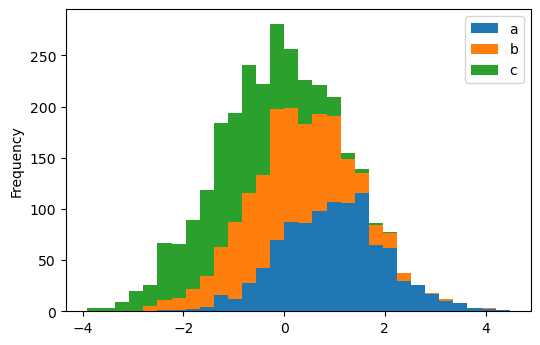

In [22]:
print(df4.head())
plt.figure();
df4.plot.hist(stacked=True, bins=30)

Histogram może zostać wyświetlony w formie obróconej o 90 stopni, może także zostac wyświetlony jako **histogram skumulowany**. 

          a         b         c
0  1.555498 -0.471466 -2.981238
1  2.500663 -1.484860 -1.266731
2  2.306300  1.048933 -1.449754
3  0.706723  0.980741 -1.875529
4  1.219103 -1.074803 -1.188020


<AxesSubplot:xlabel='Frequency'>

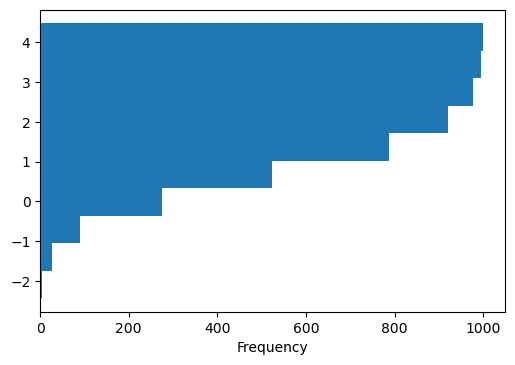

In [23]:
print(df4.head())
plt.figure();
df4['a'].plot.hist(orientation='horizontal', cumulative=True)

Histogramy uwidaczniają zakresy zmienności atrybutów, co ma duże znaczenie w kontekście określania ich zmienności dla poszczególnych klas. 

   atrybut1  atrybut2    klasa
0        86        43  klasa 3
1        79        50  klasa 3
2        73        49  klasa 3
3        69        49  klasa 3
4        74        43  klasa 3
    atrybut1  atrybut2    klasa
75        14        22  klasa 2
76         7        28  klasa 2
77         8        22  klasa 2
78         6        16  klasa 2
79         4        22  klasa 2


<AxesSubplot:ylabel='Frequency'>

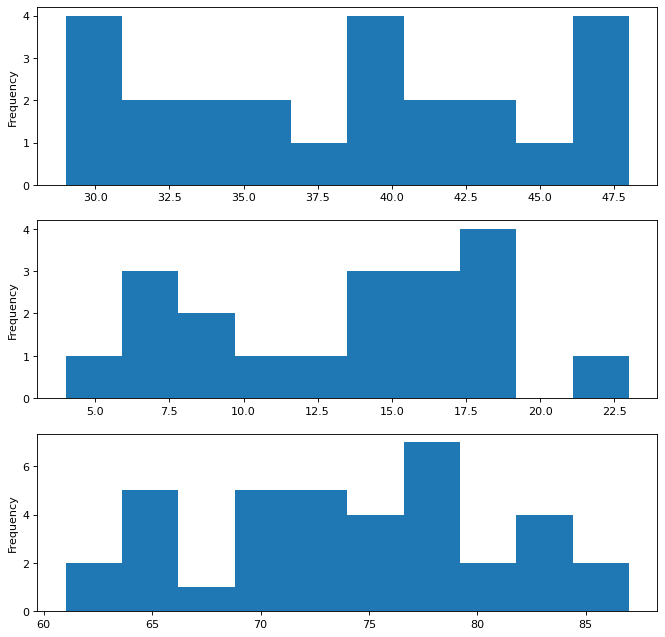

In [24]:
# wczytanie danych
d = pd.read_csv('dane1.csv')
print(d.head())
print(d.tail())

atr = 'atrybut1'
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(3,1,1)
d.loc[d.klasa == 'klasa 1',atr].plot.hist()
plt.subplot(3,1,2)
d.loc[d.klasa == 'klasa 2',atr].plot.hist()
plt.subplot(3,1,3)
d.loc[d.klasa == 'klasa 3',atr].plot.hist()

Taka prezentacja histogramów klas nie daje czytelnego obrazu charakterystyk poszczególnych klas. Bardziej czytelny wykres uzyskujemy wyświetlając histogram bez podziału na klasy.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='atrybut2', ylabel='Density'>

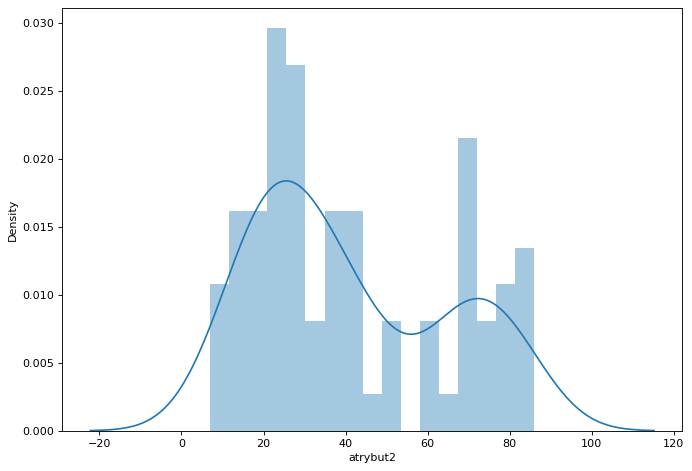

In [25]:
df = pd.read_csv('dane1.csv')
atr = 'atrybut2'
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df.loc[:,atr], bins = 17)


Wyraźnie większą czytelność uzyskujemy wyznaczając histogramy dla każdej klasy z osobna. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

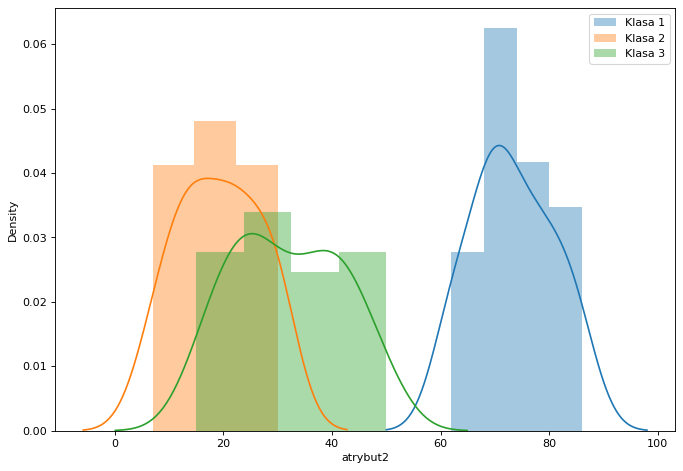

In [26]:
df = pd.read_csv('dane1.csv')
atr = 'atrybut2'
plt.figure(figsize=(10,7), dpi= 80)
sns.distplot(df.loc[df.klasa == 'klasa 1',atr], label="Klasa 1")
sns.distplot(df.loc[df.klasa == 'klasa 2',atr], label="Klasa 2")
sns.distplot(df.loc[df.klasa == 'klasa 3',atr], label="Klasa 3")
plt.legend();

Chcąc pokazać zmienność dwóch atrybutów można wyświetlić dwa histogramy jeden pod drugim.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   atrybut1  114 non-null    int64 
 1   atrybut2  114 non-null    int64 
 2   klasa     114 non-null    object
dtypes: int64(2), object(1)
memory usage: 2.8+ KB
None

 klasa 1
        atrybut1   atrybut2
count  43.000000  43.000000
mean   45.720930  71.697674
std    15.189792  19.571037
min     1.000000  10.000000
25%    36.500000  68.500000
50%    46.000000  76.000000
75%    55.000000  83.000000
max    84.000000  93.000000

 klasa 2
        atrybut1   atrybut2
count  36.000000  36.000000
mean   22.388889  28.027778
std    16.735382  17.033557
min     6.000000   8.000000
25%    11.750000  15.000000
50%    20.000000  24.500000
75%    27.250000  35.250000
max    82.000000  76.000000

 klasa 3
        atrybut1   atrybut2
count  35.000000  35.000000
mean   75.314286  25.514286
std    12.349735  14.314475
min  

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

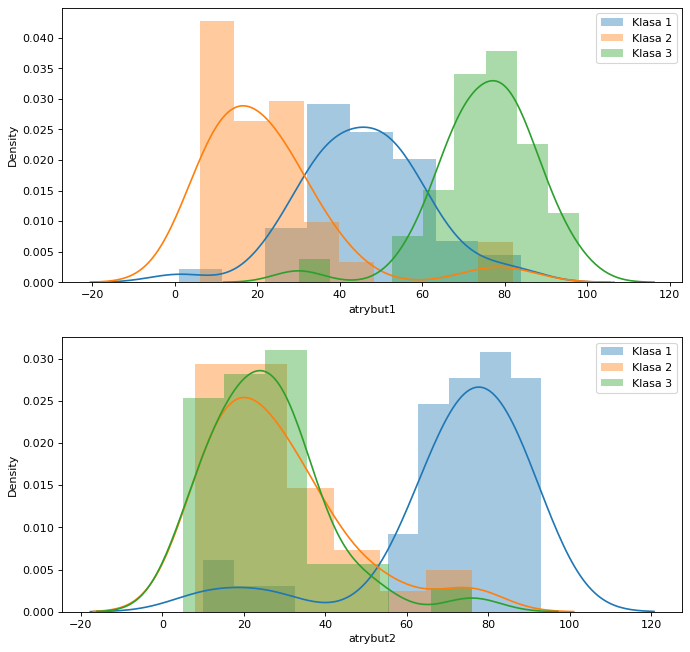

In [27]:
daneX = 'dane2.csv'

def pokaz_jeden_atrybut(atr):
    sns.distplot(df.loc[df.klasa == 'klasa 1',atr], label="Klasa 1")
    sns.distplot(df.loc[df.klasa == 'klasa 2',atr], label="Klasa 2")
    sns.distplot(df.loc[df.klasa == 'klasa 3',atr], label="Klasa 3")
    plt.legend();
    
df = pd.read_csv(daneX)   
print(df.info())
for kl in ['klasa 1','klasa 2','klasa 3']:
    print("\n",kl)
    print(df[df.klasa == str(kl)].describe())
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(2,1,1)
atr = 'atrybut1'
pokaz_jeden_atrybut(atr)
plt.subplot(2,1,2)
atr = 'atrybut2'
pokaz_jeden_atrybut(atr)


> **Zadanie** Oceń na podstawie histogramów przydatność atrybutów do rozróżnienia klasy - który z dwóch atrybutów w większym stopniu determinuje klasę obiektu ? Dokonaj podobnej analizy dla pozostałych zbiorów 'daneX.csv' (X = {2,3,4,5,6,7}) - o czym świadczą różnice w histogramach tych zbiorów ?

> **Zadanie** Narysuj histogramy poszczególnych atrybutów zbioru danych `iris` z podziałem na klasy (setosa, virginica, versicolor) i wykonaj taką samą (jak w zadaniu powyżej) analizę.

In [28]:
# wczytanie danych
iris = pd.read_csv('iris.csv', usecols = range(1,6))
iris.head()
# rozwiązanie


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


> **Zadanie** Napisz funkcję wyświetlającą statystyki opisowe klas oraz histogramy atrybutów z podziałem na klasy dla DOWOLNEJ ramki danych o atrybutach ilościowych (dowolna liczba/nazwy klas, dowolna liczba/nazwy atrybutów).

Histogram jest wykorzystywane także do określania własności obrazu cyfrowego.

Text(0.5, 1.0, 'histogram')

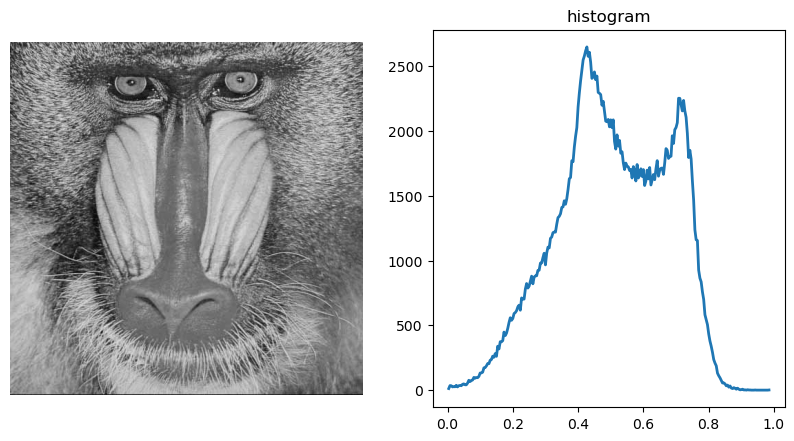

In [29]:
obraz = rgb2gray(io.imread('baboon.jpg'))

hist, hist_centers = histogram(obraz)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(obraz, cmap=plt.cm.gray)
axes[0].axis('off')
axes[1].plot(hist_centers, hist, lw=2)
axes[1].set_title('histogram')

W przypadku obrazu kolorowego najczęściej wyznaczane są histogramy poszczególnych składowych. 

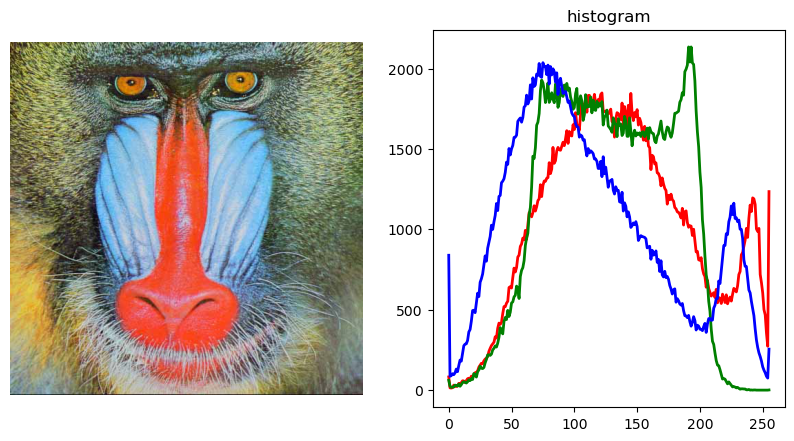

In [30]:
obraz = io.imread('baboon.jpg')
color = ('r','g','b')
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(obraz, cmap=plt.cm.gray)
axes[0].axis('off')
for i,col in enumerate(color):
    hist, hist_centers = histogram(obraz[:,:,i])
    axes[1].plot(hist_centers, hist, lw=2, color = col)
    axes[1].set_title('histogram')
plt.show()

> **Zadanie** Wybierz dowolne, wybrane przez siebie zdjęcia, wykonane samodzielnie lub jakiekolwiek inne. Wczytaj je, wyświetl i obejrzyj histogram obrazu. Jakie wnioski odnoszące się do obrazu można wyciągnąć obserwując jego histogram ?

In [31]:
# miejsce na kod rozwiązania


**Wykresy pudełkowe** umożliwiają wyświetlanie zakresów zmienności atrybutów, pokazując podstawowe miary pozycyjne (kwartyle).

<AxesSubplot:xlabel='klasa', ylabel='atrybut2'>

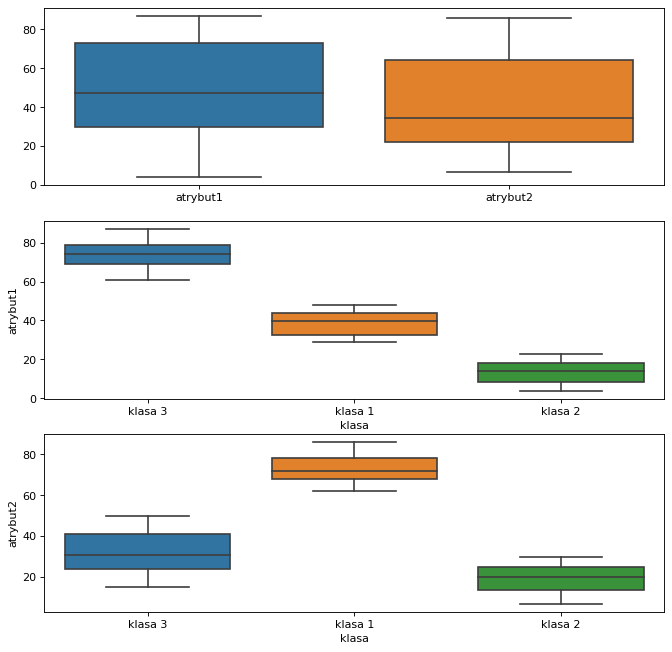

In [32]:
df = pd.read_csv('dane1.csv')
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(3,1,1)
sns.boxplot(data=df)
plt.subplot(3,1,2)
sns.boxplot(x="klasa", y="atrybut1", data=df)
plt.subplot(3,1,3)
sns.boxplot(x="klasa", y="atrybut2", data=df)

> **Zadanie** Wyświetl wykresy pudełkowe dla dla drugiego atrybutu i dla kolejnych zbiorów `dane2`,...,`dane11`. Jakie wnioski można wyciągnąć z tych wykresów ?

Ciekawą kombinacją histogramu i wykresu pudełkowego jest tzw. **wykres skrzypcowy**, pokazujący jednocześnie dystrybucję (histogram) oraz miary kwartylowe.

<AxesSubplot:xlabel='klasa', ylabel='atrybut2'>

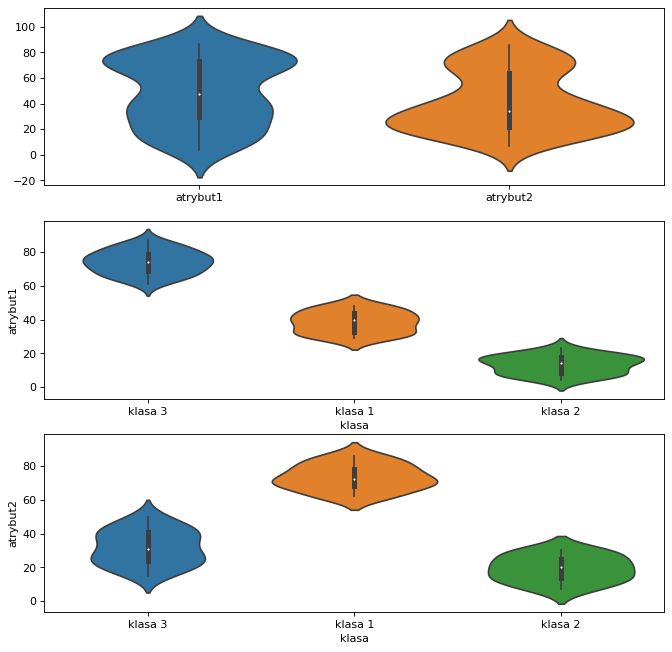

In [33]:
df = pd.read_csv('dane1.csv')
plt.figure(figsize=(10,10), dpi= 80)
plt.subplot(3,1,1)
sns.violinplot(data=df)
plt.subplot(3,1,2)
sns.violinplot(x="klasa", y="atrybut1", data=df)
plt.subplot(3,1,3)
sns.violinplot(x="klasa", y="atrybut2", data=df)

Inny wariant tego wykresu pokazuje poszczególne punkty danych.

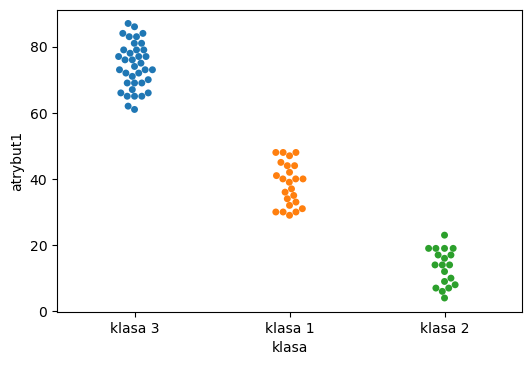

In [34]:
sns.swarmplot(x="klasa", y="atrybut1", data=df)
plt.show()

> **Zadanie** Obejrzyj zbiór `iris` korzystając z wykresów pudełkowego i skrzypcowego. Wyciągnij wnioski.

In [35]:
# rozwiązanie zadania


## 2.4 Wykresy statystyczne wielowymiarowe - wykresy punktowe

Najpopularniejszym wykresem pozwalającym na obserwację większej liczby atrybutów, w tym nie tylko ich zmienności, ale także i wzajemnych zależności jest **wykres punktowy** zwany także wykresem rozrzutu. Dwuwymiarowy wykres punktowy prezentuje dwa atrybuty danych.

   atrybut1  atrybut2    klasa
0        66        76  klasa 3
1        30         5  klasa 3
2        77        76  klasa 1
3        25        89  klasa 1
4        33        92  klasa 1
     atrybut1  atrybut2    klasa
109         7        26  klasa 2
110         8        22  klasa 2
111        11        11  klasa 2
112         6        15  klasa 2
113         6        10  klasa 2


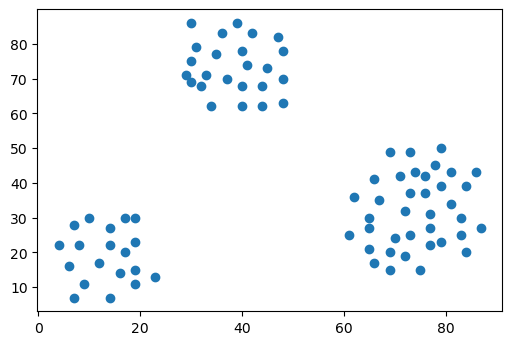

In [36]:
# wczytanie danych
d = pd.read_csv('dane2.csv')
print(d.head())
print(d.tail())
plt.plot( 'atrybut1', 'atrybut2', data=df, linestyle='none', marker='o')
plt.show()

Wiele spośród wykresów można wyświetlić w wykorzystaniem różnych pakietów. Następny przykład pokazuje ten sam wykres uzyskany przy pomocy funkcji z pakietu 'seaborn'.

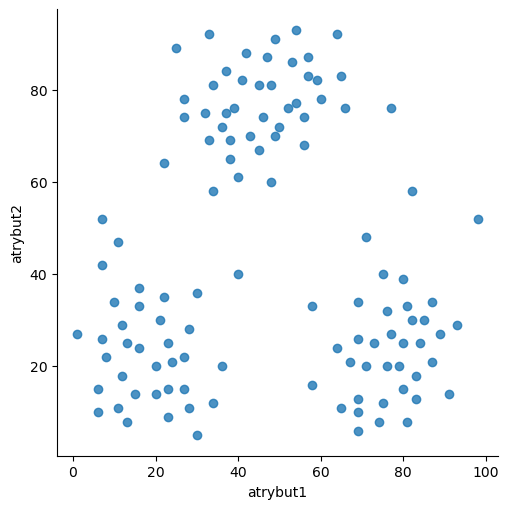

In [37]:
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, legend=False)

Jeśli obiekty są przyporządkowane do pewnych klas (a tak jest w przypadku zbioru danych `dane1.csv`), to przynależność tam może zostać oznaczona odpowiednim kolorem.

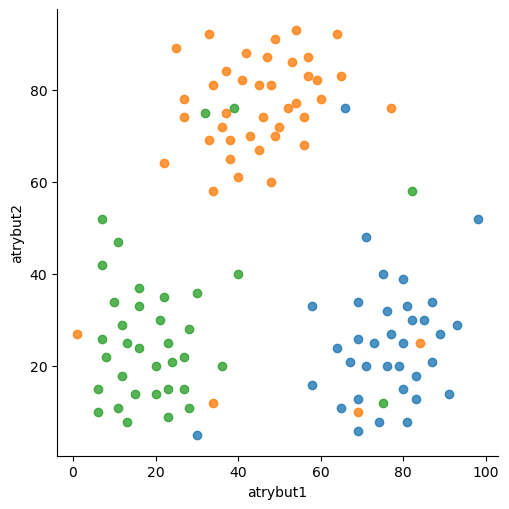

In [38]:
sns.lmplot( x="atrybut1", y="atrybut2", data=d, fit_reg=False, hue='klasa', legend=False)

> **Zadanie** Obejrzyj macierze wykresów punktowych zbiorów `dane1.csv` ...`dane11.csv`. Czym różnią się te zbiory ? 

In [39]:
# miejsce na kod


W przypadku większej liczby atrybutów, wyznacza się macierz wykresów punktowych, w której znajdują się wykresy punktowe par atrybutów.

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


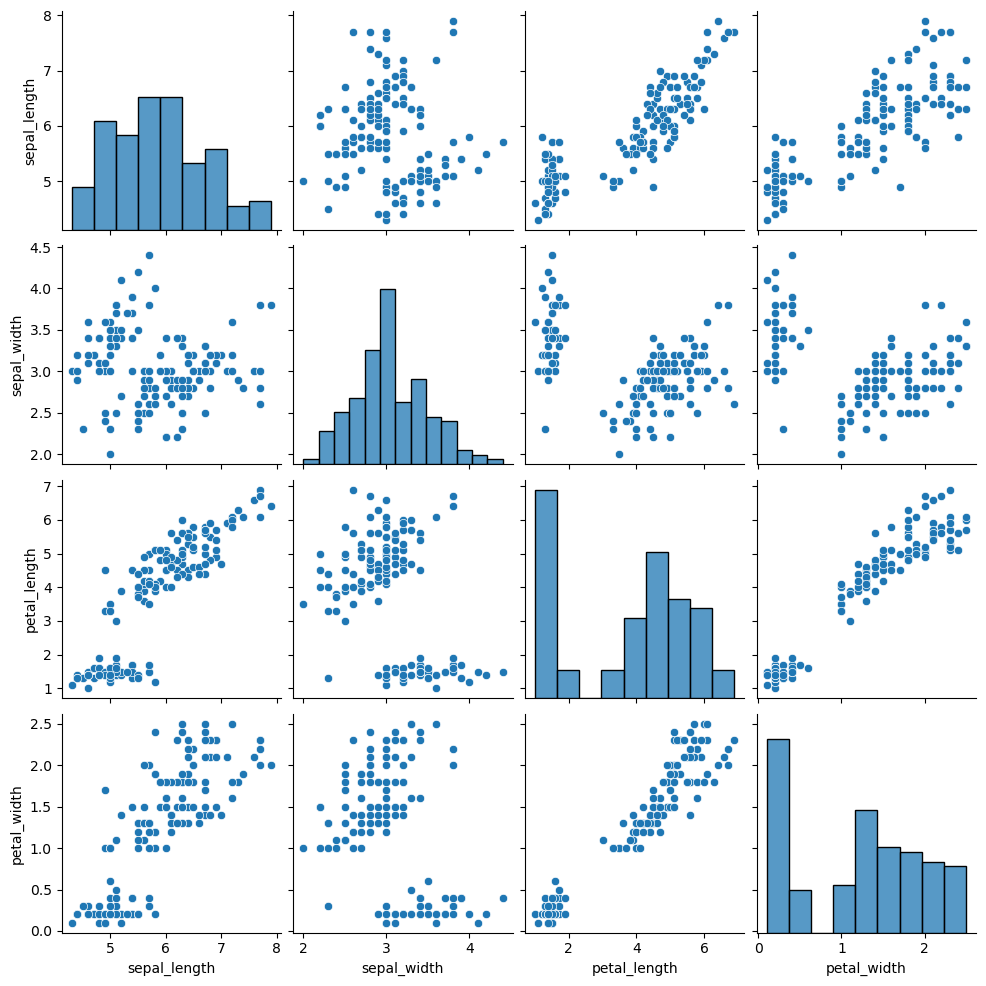

In [40]:
i = pd.read_csv('iris.csv', usecols = range(1,6))
print(i.head())
sns.pairplot(i, kind="scatter")
plt.show()

Dużo więcej informacji można uzyskać wyświetlając wersję z oznaczonymi klasami

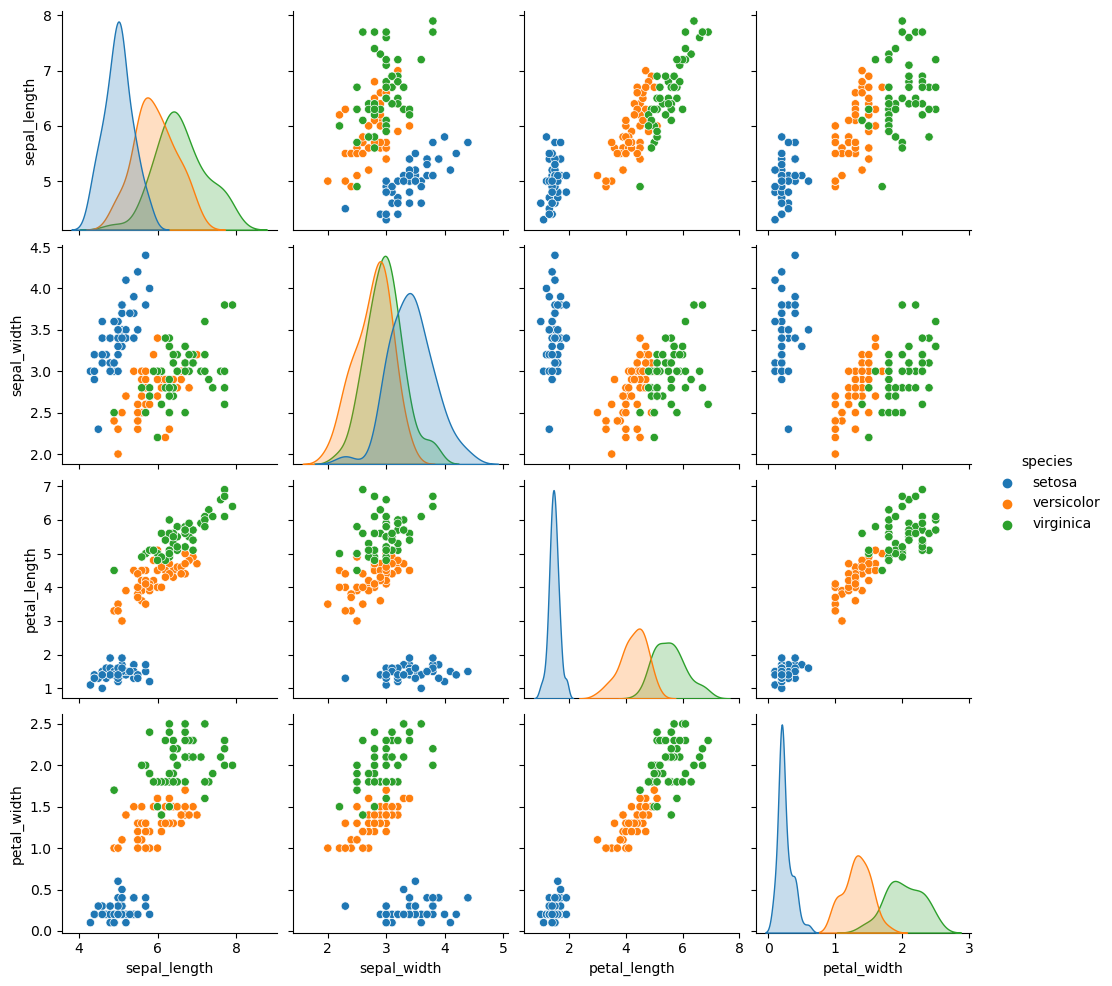

In [41]:
i = pd.read_csv('iris.csv', usecols = range(1,6))
sns.pairplot(i, kind="scatter", hue = "species")
plt.show()

> **Zadanie** Jak sądzisz, które cechy botanicy biorą pod uwagę rozróżnając poszczególne odmiany kwiatów irysa ?

## Dla dociekliwych

* [Wykresy w Pythonie](https://python-graph-gallery.com/)
* [Histogramy](https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0)
* [Histogramy obrazów](https://docs.opencv.org/3.1.0/d1/db7/tutorial_py_histogram_begins.html)
* [Wykresy pudełkowe](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
* [Wizualizacja zbioru iris](http://www.learn4master.com/machine-learning/visualize-iris-dataset-using-python)

---
---
Historia zmian:
* wersja pierwotna r.akad 18/19: 03.2019 (MI)
* wersja r.akad 19/20: 26.03.2020 (MI)
* wersja r.akad 19/20: 27.03.2020 (GS), 1.04.2020 (MI)
* wersja r.akad 20/21: 23.10.2020 (MI)